In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from autils import *
%matplotlib inline

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

# datos
X, y = load_data()

print ('el primer dígito es: ', y[0,0])
print ('La forma de X es: ' + str(X.shape))
print ('La forma de Y es: ' + str(y.shape))


el primer dígito es:  0
La forma de X es: (1000, 400)
La forma de Y es: (1000, 1)


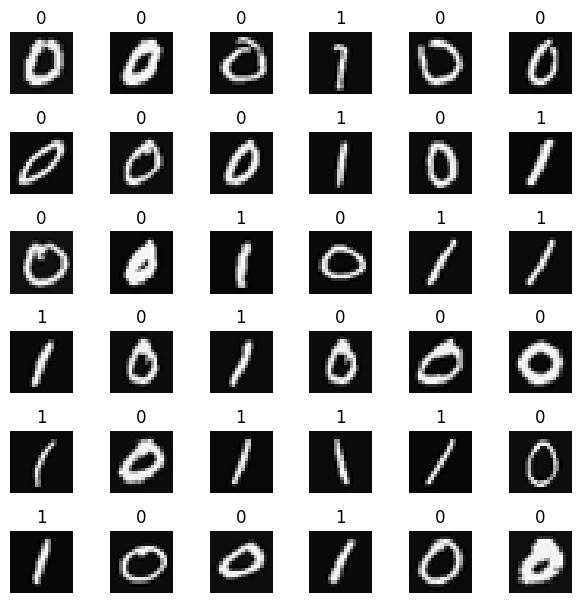

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(6,6, figsize=(6,6))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # seleccione indices e imágenes aleatorias
    random_index = np.random.randint(m)
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # muestre la imagen
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # muestre etiqueta
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

In [3]:
# Modelo
model = Sequential(
    [    
 # dimensión de cada x (400)     
        tf.keras.Input(shape=(400,)),
 # 1 capa de 25 unidades activada función Sigmoid       
            Dense(units=25, activation='sigmoid'),
 # 2 capa de 15 unidades activada función Sigmoid      
        Dense(units=15, activation='sigmoid'),
 # Capa de salida de 1 unidad y activada función Sigmoid
        Dense(units=1, activation='sigmoid')     
    ], name = "my_sequential" 
)                            
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)
model.fit(
    X,y,
    epochs=20
)


Epoch 1/20
32/32 [==============================] - 2s 5ms/step - loss: 0.5882
Epoch 2/20
32/32 [==============================] - 0s 4ms/step - loss: 0.3996
Epoch 3/20
32/32 [==============================] - 0s 3ms/step - loss: 0.2525
Epoch 4/20
32/32 [==============================] - 0s 4ms/step - loss: 0.1643
Epoch 5/20
32/32 [==============================] - 0s 4ms/step - loss: 0.1154
Epoch 6/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0871
Epoch 7/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0694
Epoch 8/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0571
Epoch 9/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0482
Epoch 10/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0415
Epoch 11/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0365
Epoch 12/20
32/32 [==============================] - 0s 7ms/step - loss: 0.0323
Epoch 13/20
32/32 [==============================

1/1 [==============================] - 0s 30ms/step


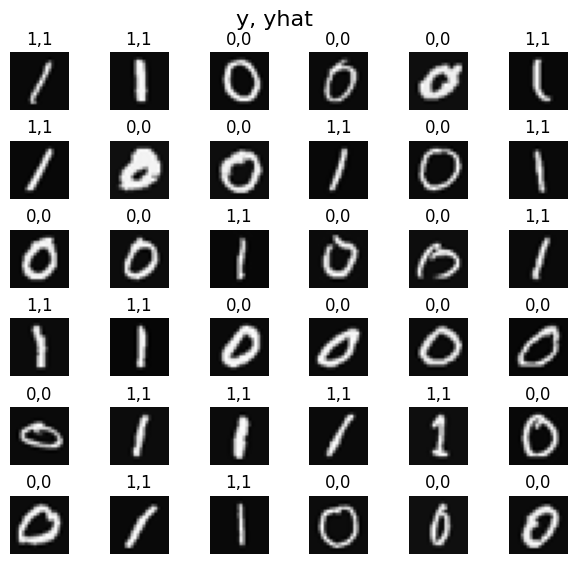

In [4]:
prediction = model.predict(X[0].reshape(1,400))  # A cero
prediction = model.predict(X[500].reshape(1,400))  # A uno

if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(6,6, figsize=(6,6))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # selección aleatoria
    random_index = np.random.randint(m)
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # muestre imagen
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predice usando la red neuronal
    prediction = model.predict(X[random_index].reshape(1,400))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
    # Muestra la etiqueta encima de la imagen
    ax.set_title(f"{y[random_index,0]},{yhat}")
    ax.set_axis_off()
fig.suptitle("y, yhat", fontsize=16)
plt.show()    
    

In [ ]:
fig = plt.figure(figsize=(1, 1))
errors = np.where(y != yhat)
random_index = errors[0][0]
X_random_reshaped = X[random_index].reshape((20, 20)).T
plt.imshow(X_random_reshaped, cmap='gray')
plt.title(f"{y[random_index,0]}, {yhat}")
plt.axis('off')
plt.show()